In [2]:
# 1. Загрузите изображение в оттенках серого sar_1_gray.jpg. 
# 2. постройте гистограмму
# 3. реализуйте алгоритм гамма коррекции с параметром гамма <1, >1.
# 4. Сравните исходное изображение, скорректированное при помощи гамма-фильтра. MSE, SSIM.
# 5. реализуйте алгоритм статистической цветокоррекции на основе статистики eq_gray.
# 6. Протестируйте работу алгоритмов пороговой фильтрации с различными параметрами.
# Для каждого решения - напечатайте результат

# 1. Загрузим изображение в оттенках серого sar_1_gray.jpg.

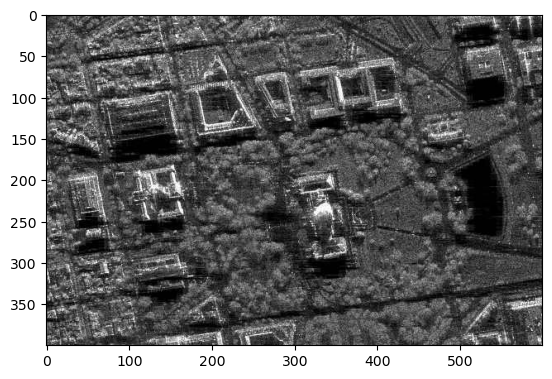

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('sar_1_gray.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image)

# 2. Построение гистограммы.

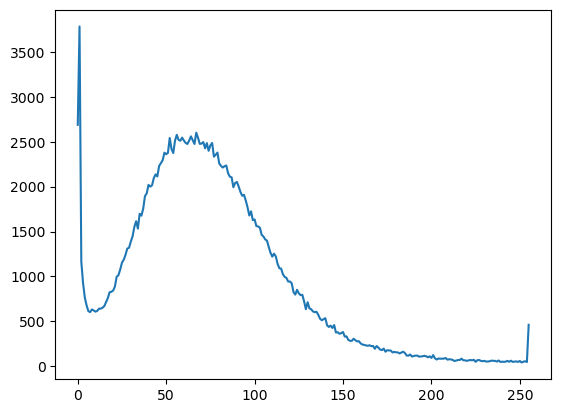

In [3]:
histSize = 256
histRange = (0, 256)
accumulate = False
b = image[:,:,0]

b_hist = cv2.calcHist([b], [0], None, [histSize], histRange, accumulate=accumulate)
plt.plot(b_hist)

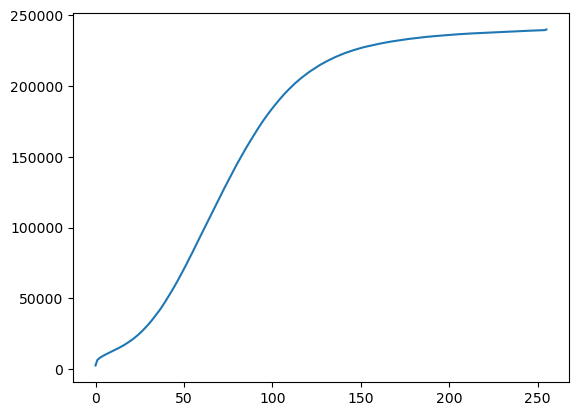

In [4]:
b_hist_cum = b_hist.cumsum()
plt.plot(b_hist_cum)

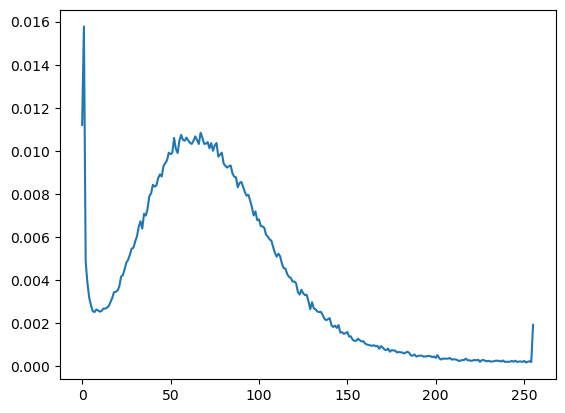

In [5]:
b_hist_norm = b_hist /  (image.shape[0] * image.shape[1])
plt.plot(b_hist_norm)

# Алгоритм гамма коррекции с параметром гамма <1, >1.

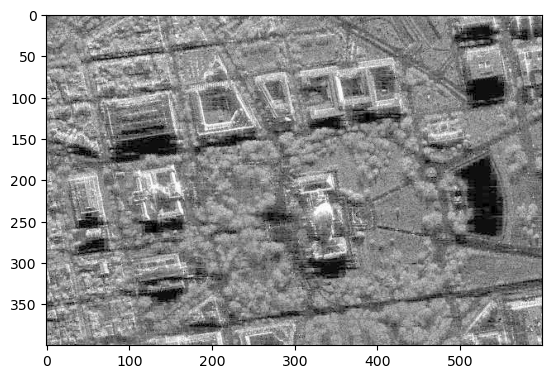

In [6]:
def gamma_correction(image, gamma):
    """
    Применяет гамма-коррекцию к изображению
    gamma < 1: осветление изображения
    gamma > 1: затемнение изображения
    """
    normalized = image.astype(np.float32) / 255.0
    corrected = np.power(normalized, gamma)
    corrected_image = (corrected * 255).astype(np.uint8)
    return corrected_image

gamma_05 = gamma_correction(image, 0.5)  # gamma < 1 (осветление)
gamma_20 = gamma_correction(image, 2.0)  # gamma > 1 (затемнение)
plt.imshow(gamma_05)

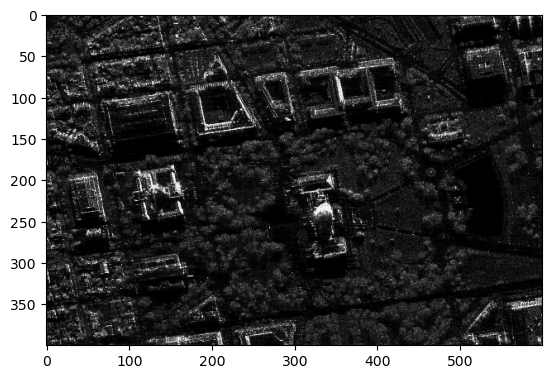

In [7]:
plt.imshow(gamma_20)

# 4. Сравним исходное изображение, скорректированное при помощи гамма-фильтра. MSE, SSIM.

In [8]:
from skimage.metrics import structural_similarity, mean_squared_error

g_05 = cv2.cvtColor(gamma_05, cv2.COLOR_BGR2GRAY) 
(ssim, diff) = structural_similarity(image_gray, g_05, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(ssim))
mse = mean_squared_error(image_gray, g_05)
print("MSE: {}".format(mse))

SSIM: 0.7875008686792753
MSE: 3250.429145833333


In [9]:
g_20 = cv2.cvtColor(gamma_20, cv2.COLOR_BGR2GRAY) 
(ssim, diff) = structural_similarity(image_gray, g_20, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(ssim))
mse = mean_squared_error(image_gray, g_20)
print("MSE: {}".format(mse))

SSIM: 0.5270459922820344
MSE: 2383.7636375


# 5. Алгоритм статистической цветокоррекции на основе статистики eq_gray.

In [10]:
mean = image_gray.mean()
std = image_gray.std()
eq_gray = cv2.equalizeHist(image_gray)
print(mean,std)

74.94157083333333 43.658465466227916


Исходная статистика: mean=74.94, std=43.66
Выравненная статистика: mean=127.03, std=74.27


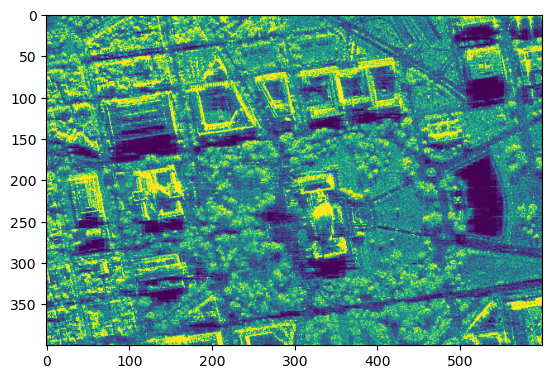

In [11]:
def statistical_color_correction(original_img, reference_stats):
    """
    Статистическая цветокоррекция на основе статистики reference изображения
    """
    orig_mean = original_img.mean()
    orig_std = original_img.std()
    
    ref_mean = reference_stats['mean']
    ref_std = reference_stats['std']
    
    corrected_img = ((original_img.astype(np.float32) - orig_mean) * 
                    (ref_std / max(orig_std, 1e-6)) + ref_mean)
    
    corrected_img = np.clip(corrected_img, 0, 255).astype(np.uint8)
    
    return corrected_img

eq_mean = eq_gray.mean()
eq_std = eq_gray.std()

print(f"Исходная статистика: mean={mean:.2f}, std={std:.2f}")
print(f"Выравненная статистика: mean={eq_mean:.2f}, std={eq_std:.2f}")

reference_stats = {'mean': eq_mean, 'std': eq_std}

corrected_image = statistical_color_correction(image_gray, reference_stats)
plt.imshow(corrected_image)

# 6. Протестировать работу алгоритмов пороговой фильтрации с различными параметрами.

0


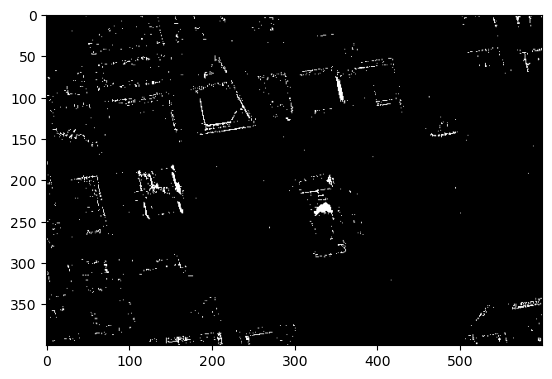

In [19]:
_,thresh1 = cv2.threshold(image_gray,200,255,cv2.THRESH_BINARY)
print(thresh1[thresh1==100].sum())
plt.imshow(thresh1, cmap='gray')

0


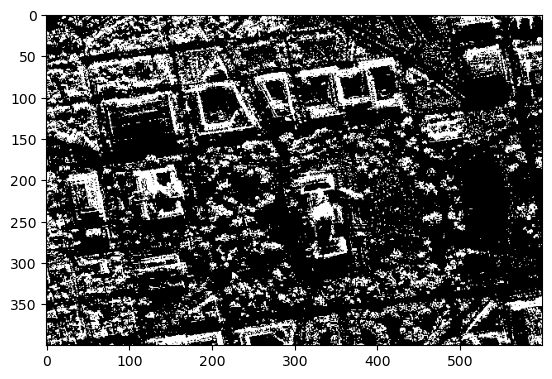

In [20]:
_,thresh1 = cv2.threshold(image_gray,100,200,cv2.THRESH_BINARY)
print(thresh1[thresh1==100].sum())
plt.imshow(thresh1, cmap='gray')